In [1]:
# imports
import numpy as np
from pylab import *
from preprocessing import get_preprocessed_data
from features import find_peaks
import audioFeatureExtraction

In [2]:
x_dataA, y_labelA, framerate_A = get_preprocessed_data('A', N=2, factor=10)

x_dataB, y_labelB, framerate_B = get_preprocessed_data('B', N=2, factor=5)

In [ ]:
# get peaks for A
dataA_peaks = find_peaks(x_dataA, 'A')

n = 10
figure()
title(y_labelA[n])
plot(x_dataA[n],'b')
scatter(dataA_peaks[n],x_dataA[n][dataA_peaks[n]],c='r')
show()

In [ ]:
# get peaks for B
dataB_peaks = find_peaks(x_dataB, 'B')

n = 140
figure()
title(y_labelB[n])
plot(x_dataB[n],'b')
scatter(dataB_peaks[n],x_dataB[n][dataB_peaks[n]],c='r')
show()

In [ ]:
# zero crossing rate of frame 
zero_crossings = np.array([audioFeatureExtraction.stZCR(x) for x in x_dataA])
figure()
scatter(range(0,len(x_dataA)),zero_crossings)
show()

In [ ]:
# signal energy of frame
energy = np.array([audioFeatureExtraction.stEnergy(x) for x in x_dataA])
figure()
scatter(range(0,len(x_dataA)),energy)
show()

In [ ]:
# entropy of energy
entropy = np.array([audioFeatureExtraction.stEnergyEntropy(x, numOfShortBlocks=50) for x in x_dataA])
figure()
scatter(range(0,len(x_dataA)),entropy)
show()

3569.0
(120, 7138)


/Users/lindawang/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


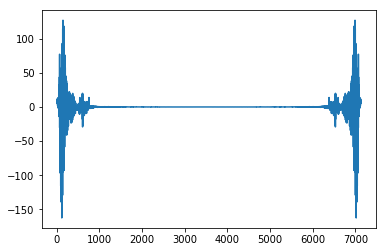

In [5]:
# frequency domain
X_dataA = np.array([np.fft.fft(x) for x in x_dataA])
for X in X_dataA:
    print(len(X)/2)
    break
print(X_dataA.shape)
figure()
plot(X_dataA[70])
show()

In [ ]:
# spectral entropy
entropy_freq = np.array([audioFeatureExtraction.stSpectralEntropy(X, numOfShortBlocks=150) for X in X_dataA])
figure()
scatter(range(0,len(X_dataA)),entropy_freq)
show()

In [ ]:
# spectral flux
flux = np.array([np.abs(audioFeatureExtraction.stSpectralFlux(X[:int(len(X)/2)], X[int(len(X)/2):])) for X in X_dataA])
#flux[np.argmax(flux)] = 0
flux = flux/max(flux)
figure()
scatter(range(0,len(X_dataA)),flux)
show()

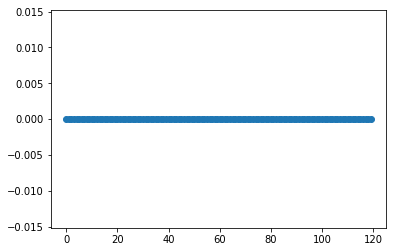

In [9]:
# spectral roll-off
c = 343 # speed of sound
Fs = int(framerate_A[0]/10) # framerate is the same for all of set A
rolloff = np.array([audioFeatureExtraction.stSpectralRollOff(X,c,Fs) for X in X_dataA])
figure()
scatter(range(0,len(X_dataA)),rolloff)
show()

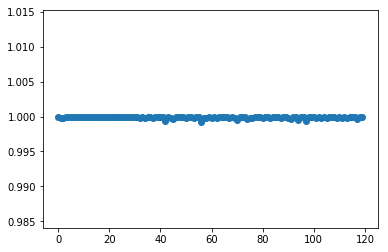

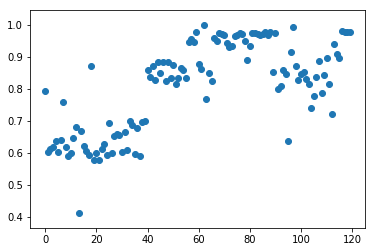

In [17]:
# spectral centroid of frame (given abs(FFT))
Fs = int(framerate_A[0]/10) # framerate is the same for all of set A
centroid = np.array([audioFeatureExtraction.stSpectralCentroidAndSpread(np.abs(X),Fs) for X in X_dataA])
centroid[:,0] = centroid[:,0]/max(centroid[:,0])
centroid[:,1] = centroid[:,1]/max(centroid[:,1])
figure()
scatter(range(0,len(X_dataA)),centroid[:,0]) #centroid
show()
figure()
scatter(range(0,len(X_dataA)),centroid[:,1]) #spread
show()